# **Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Jaya Jaya Institut**


*   Nama: Kirana Alyssa Putri
*   Email: kiranaalyssa.putri@gmail.com
*   ID Dicoding: kiranaalyssa



## **Persiapan**

### Menyiapkan Library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

### Menyiapkan Data yang akan digunakan

In [ ]:
df = pd.read_csv('data.csv', sep=";")
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## **Data Understanding**

In [ ]:
df.shape

(4424, 37)

In [ ]:
df.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_wit

In [ ]:
print("Jumlah kolom numerik:", df.select_dtypes(include='int64').shape[1])
print("Jumlah kolom kategorikal:", df.select_dtypes(include='object').shape[1])

Jumlah kolom numerik: 29
Jumlah kolom kategorikal: 1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [ ]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [ ]:
df.isnull().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


In [ ]:
df.duplicated().sum()

np.int64(0)

## **Data Preparation / Preprocessing**

In [ ]:
# Mengganti Tipe Data
df['Status'] = df['Status'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Marital_status                                4424 non-null   int64   
 1   Application_mode                              4424 non-null   int64   
 2   Application_order                             4424 non-null   int64   
 3   Course                                        4424 non-null   int64   
 4   Daytime_evening_attendance                    4424 non-null   int64   
 5   Previous_qualification                        4424 non-null   int64   
 6   Previous_qualification_grade                  4424 non-null   float64 
 7   Nacionality                                   4424 non-null   int64   
 8   Mothers_qualification                         4424 non-null   int64   
 9   Fathers_qualification                         4424 n

In [ ]:
# Cek Outliers
numerical_columns = df.select_dtypes(include='number').columns

outlier_count = 0

for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Hitung berapa outlier di kolom ini
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count += outliers.shape[0]

print(f"Total outlier (IQR method): {outlier_count}")

Total outlier (IQR method): 10714


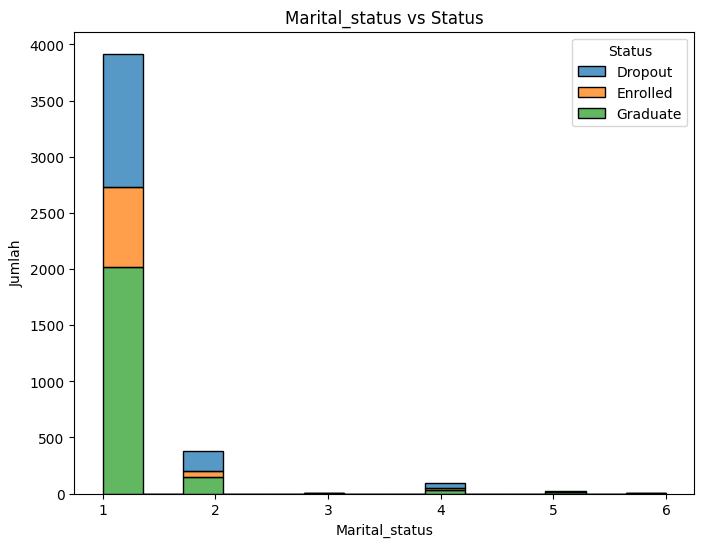

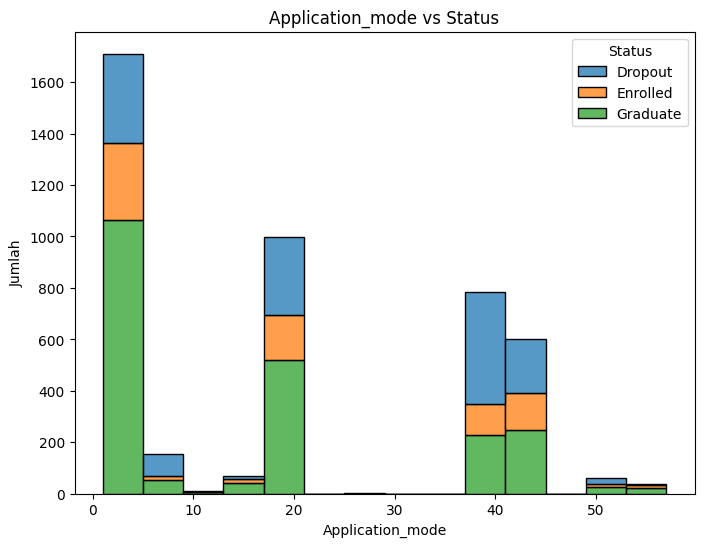

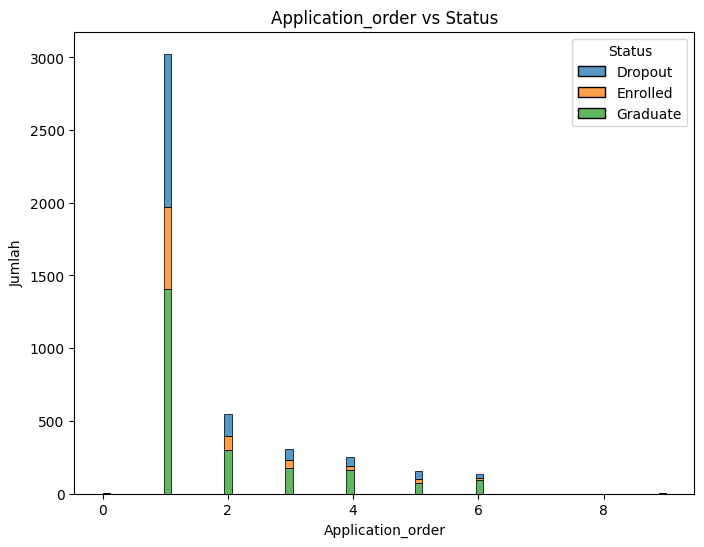

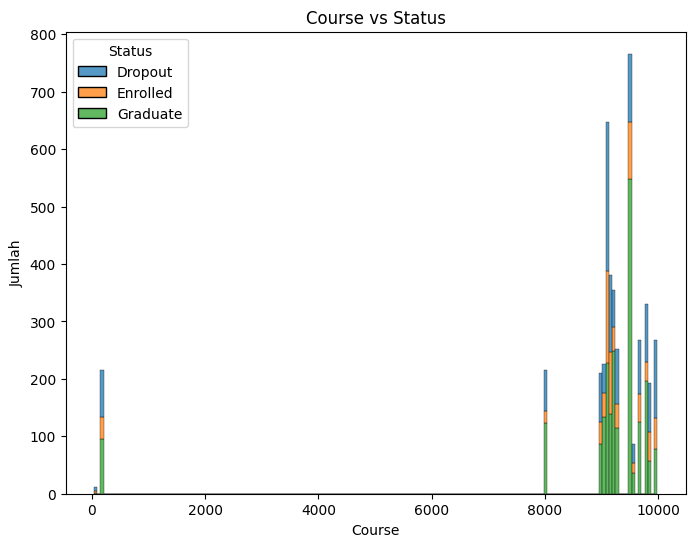

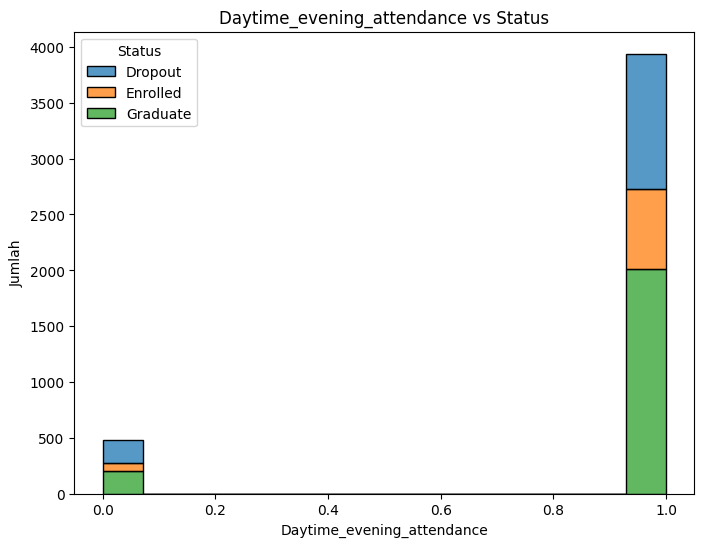

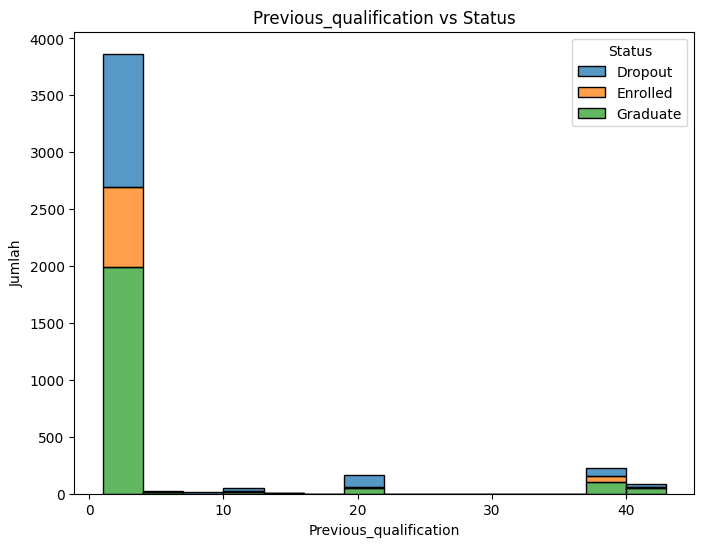

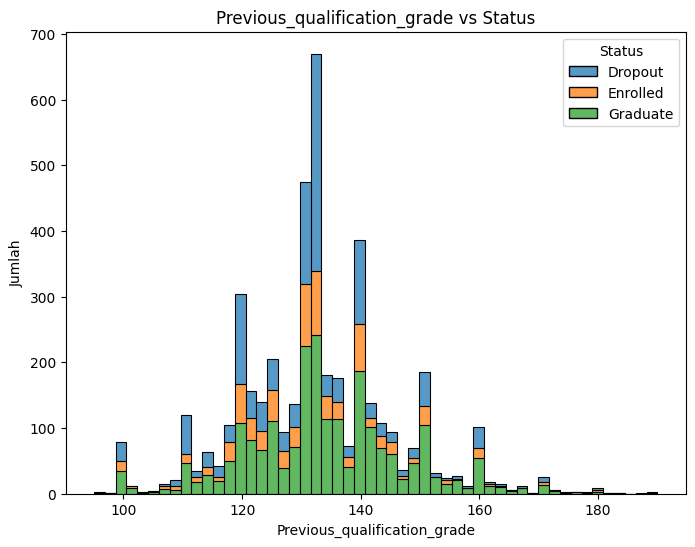

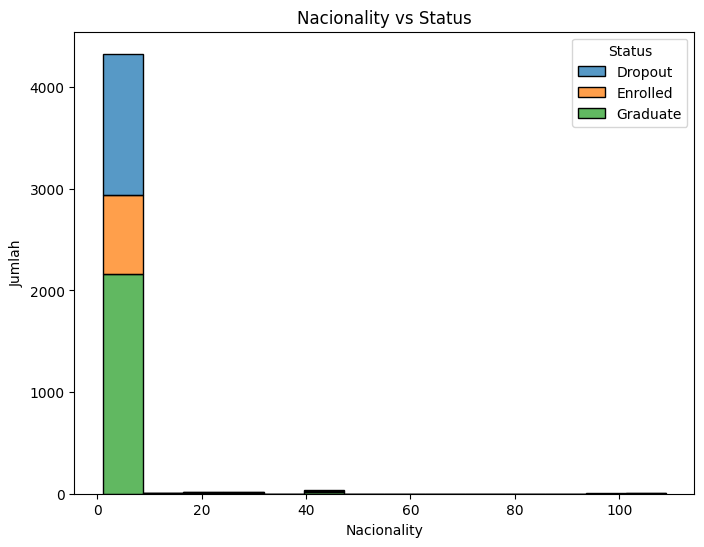

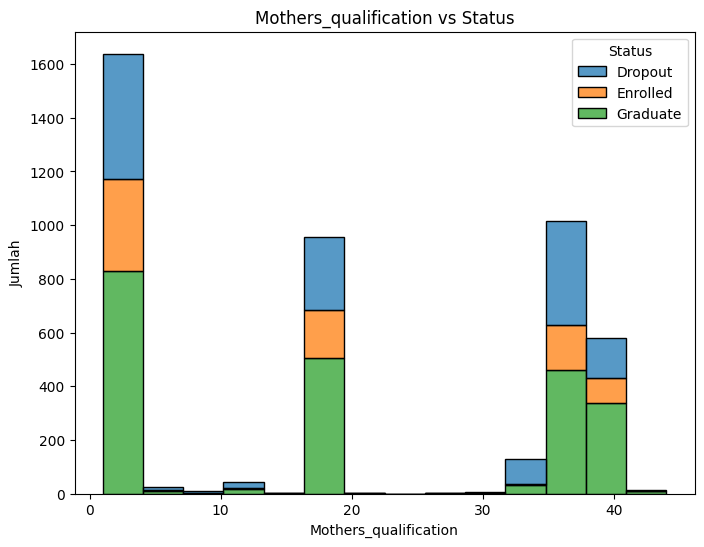

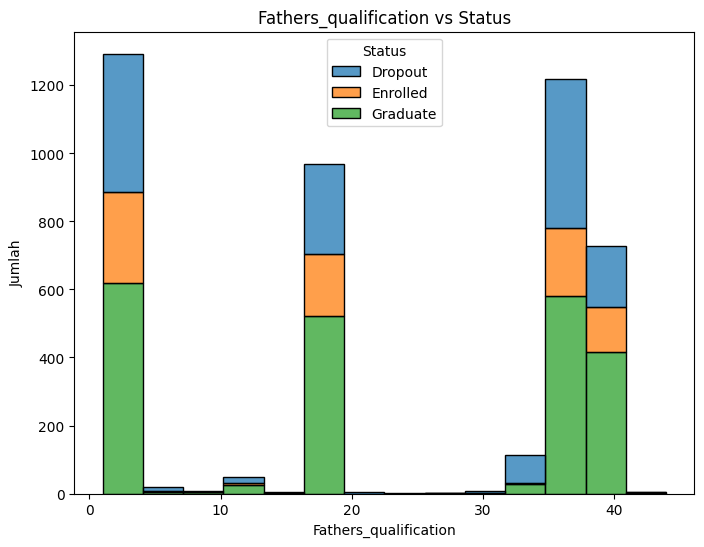

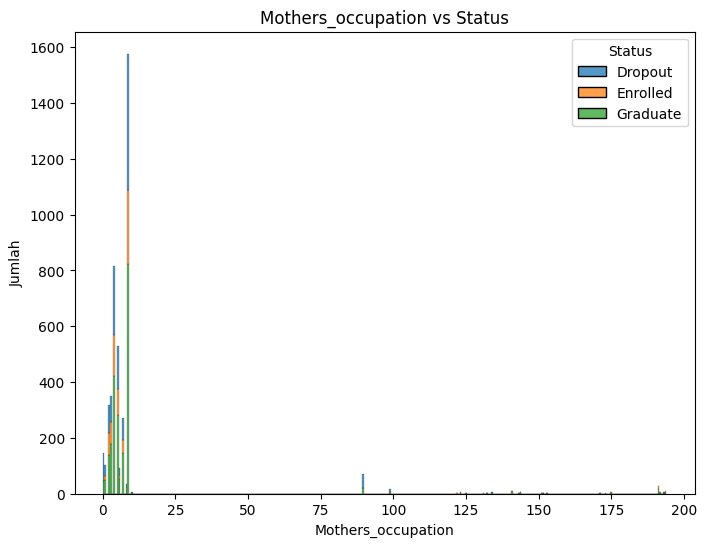

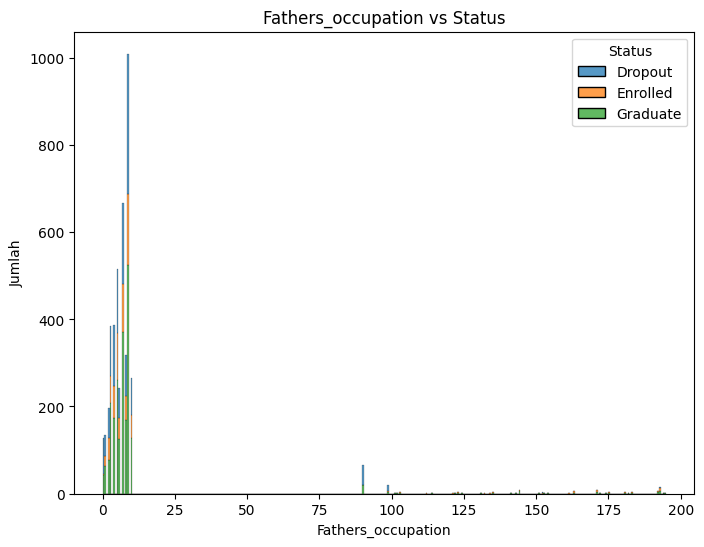

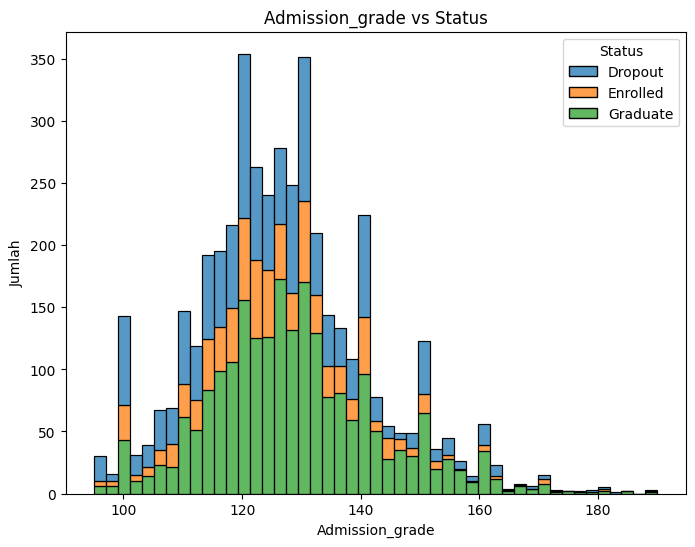

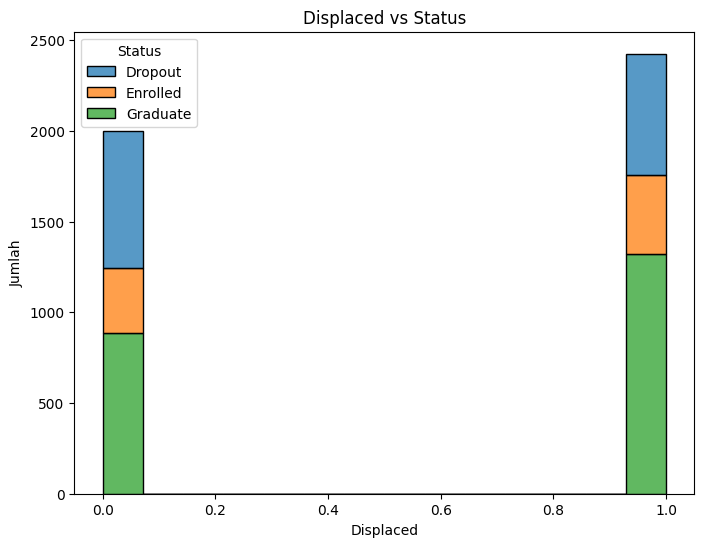

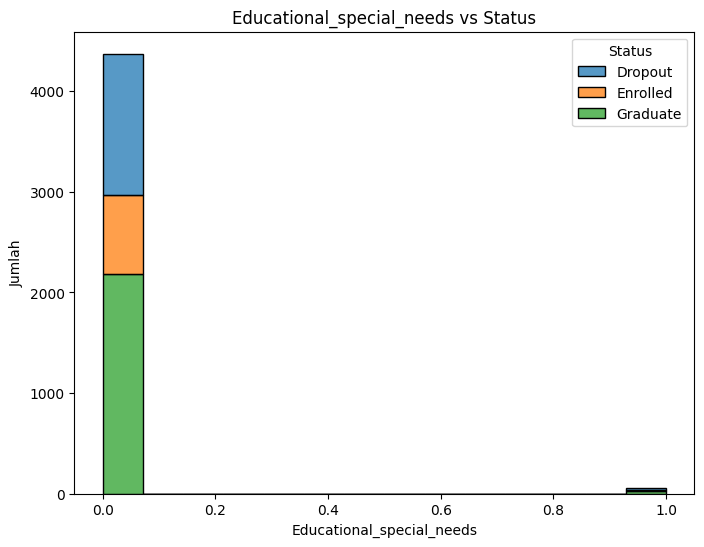

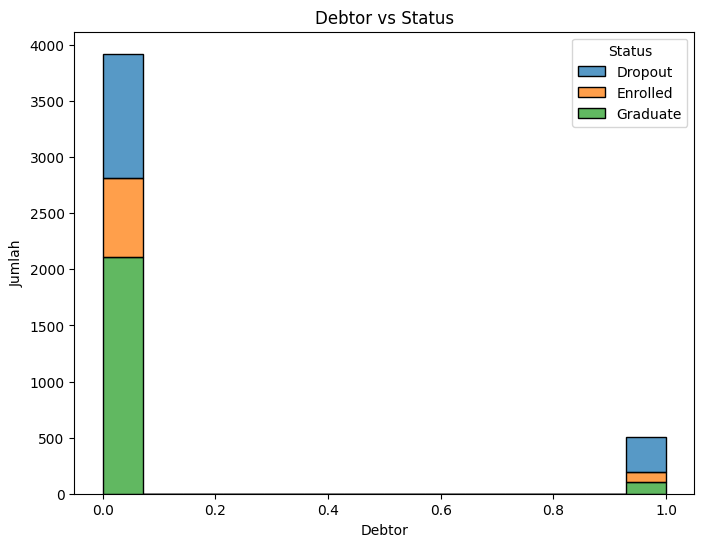

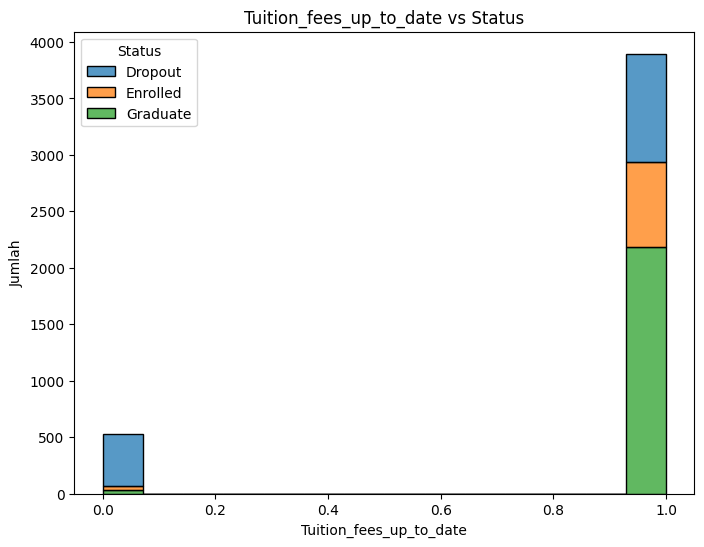

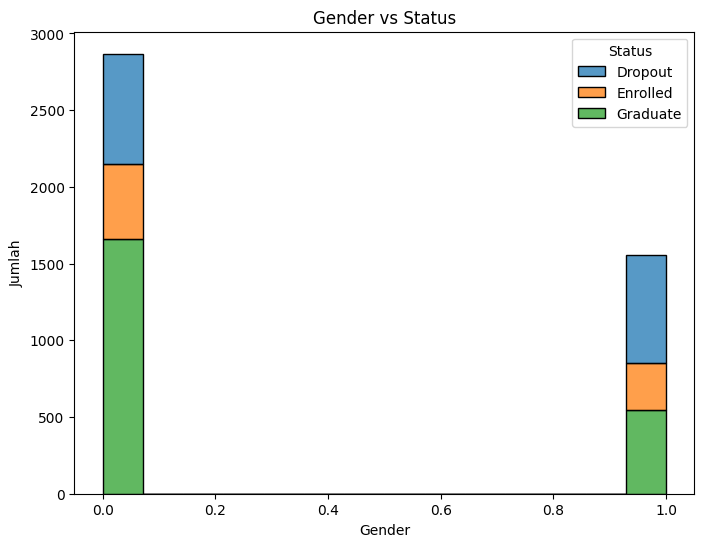

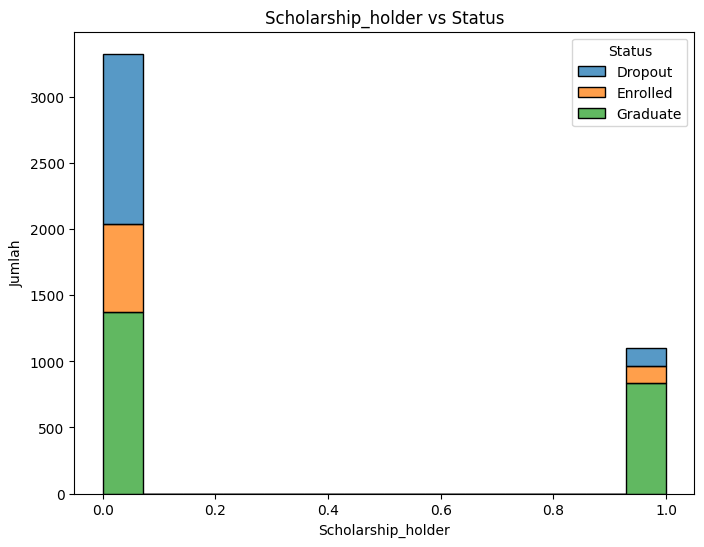

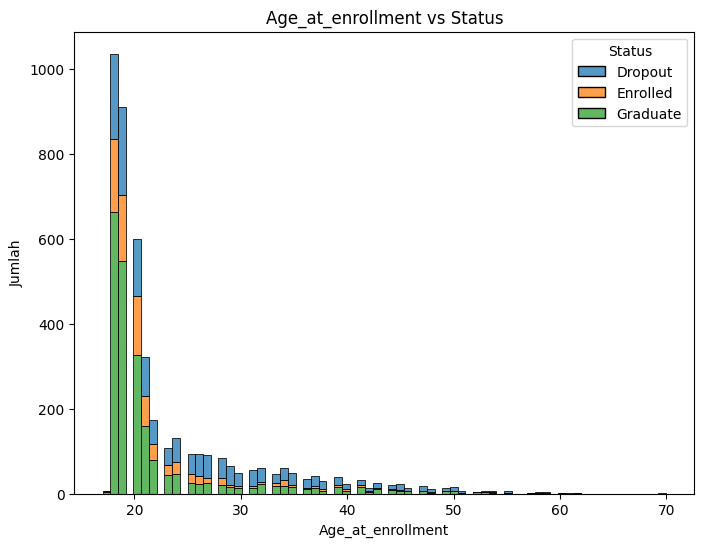

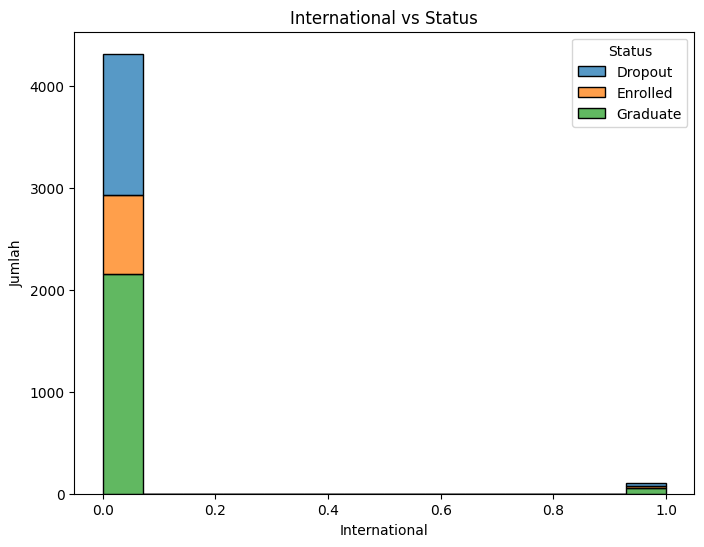

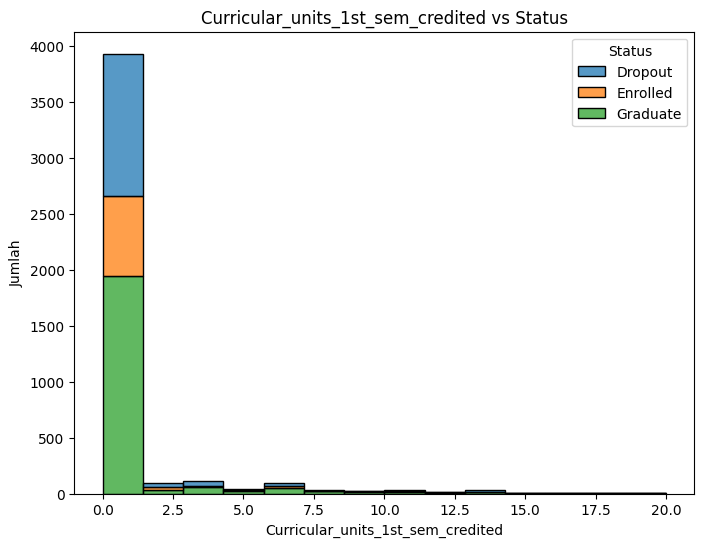

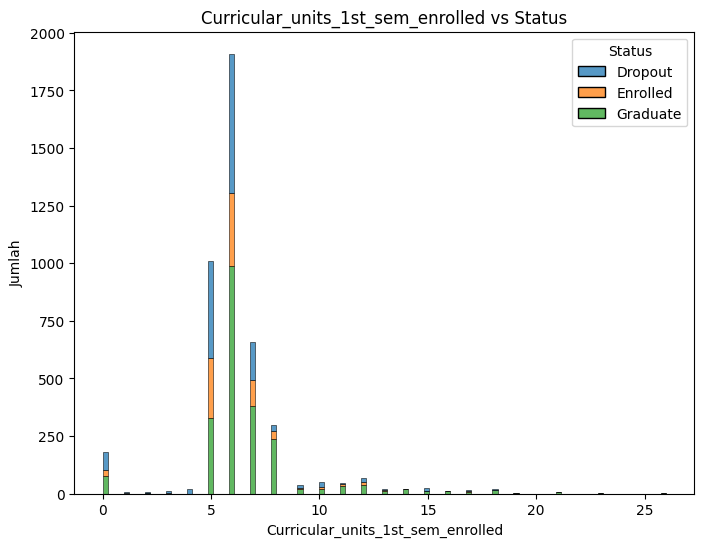

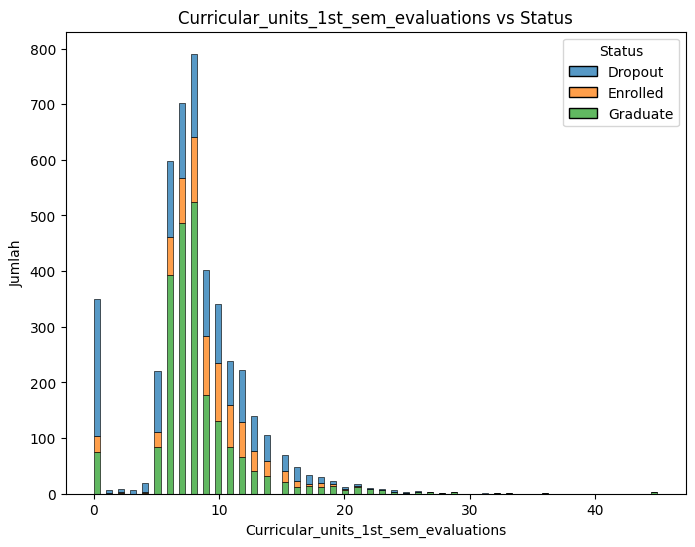

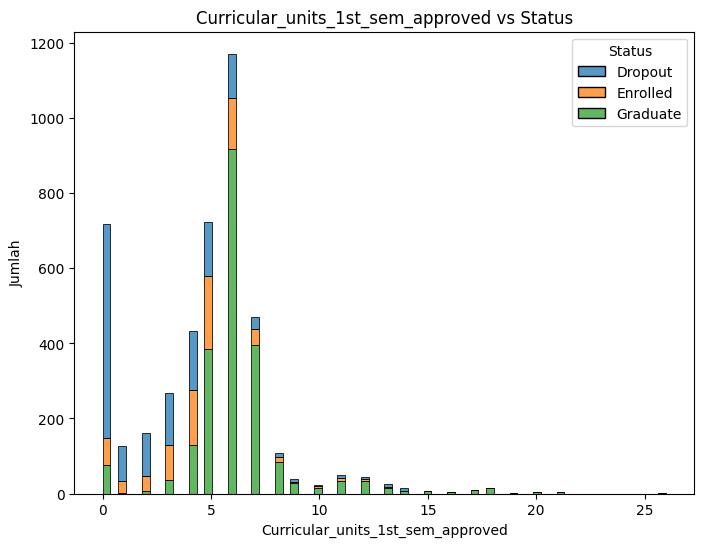

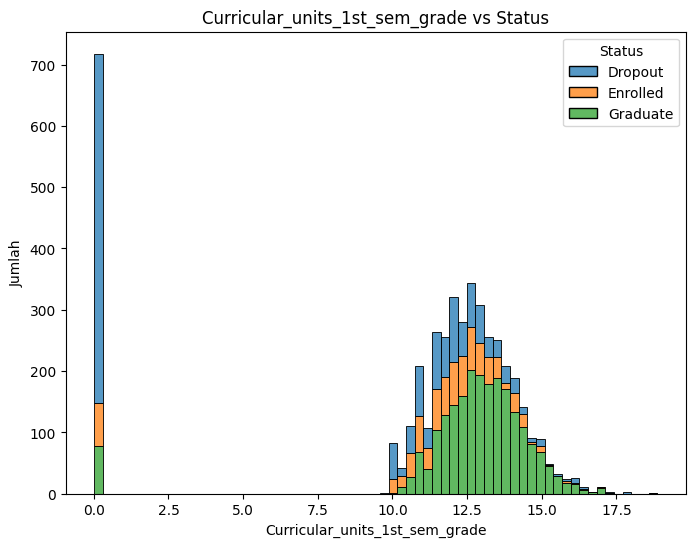

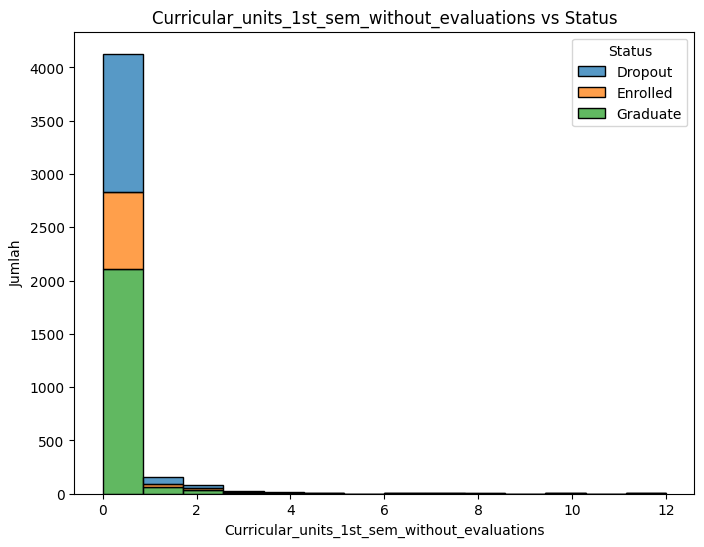

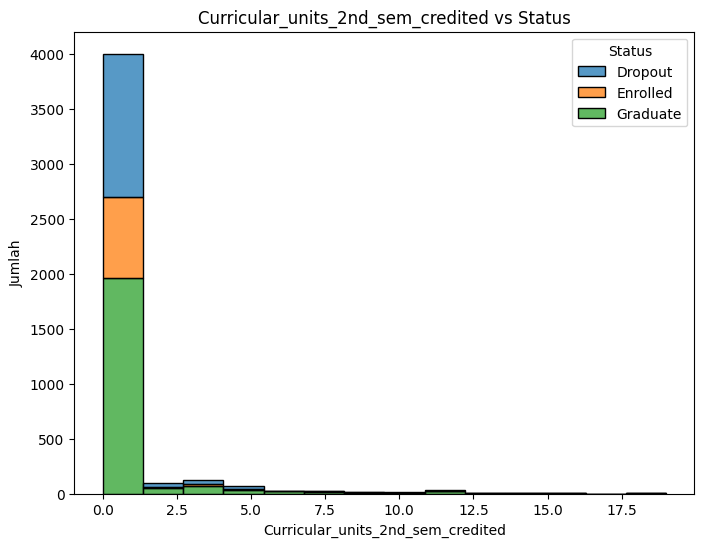

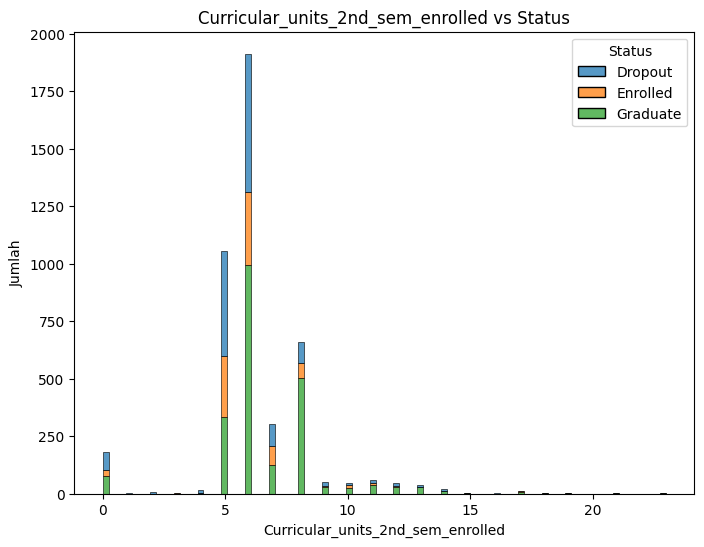

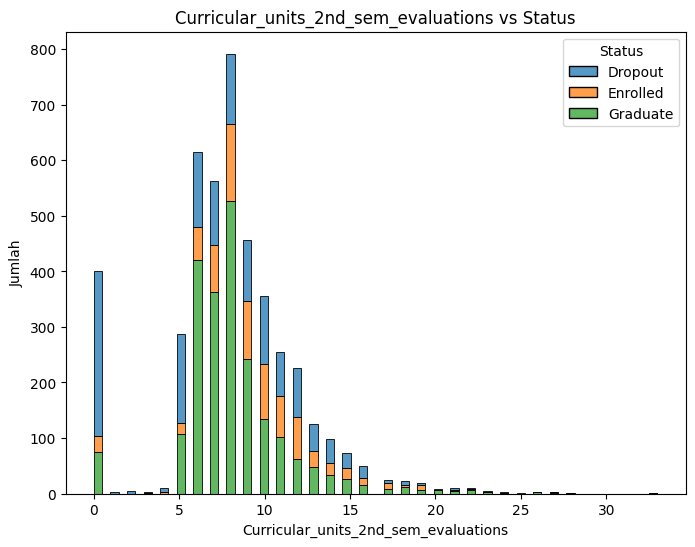

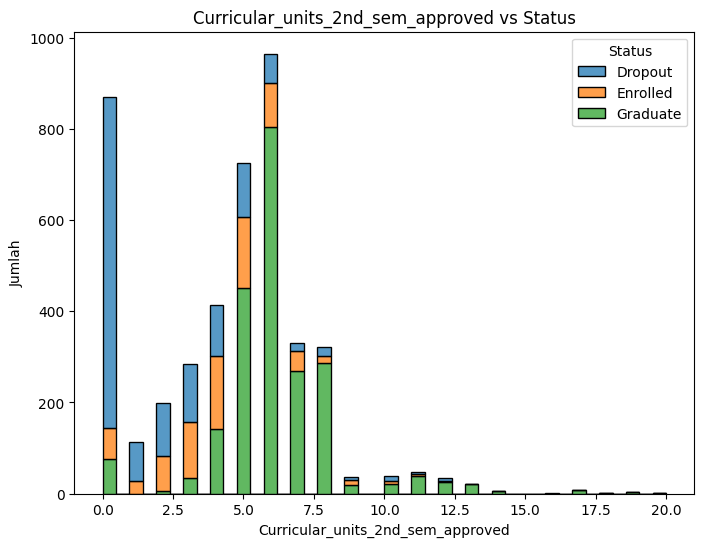

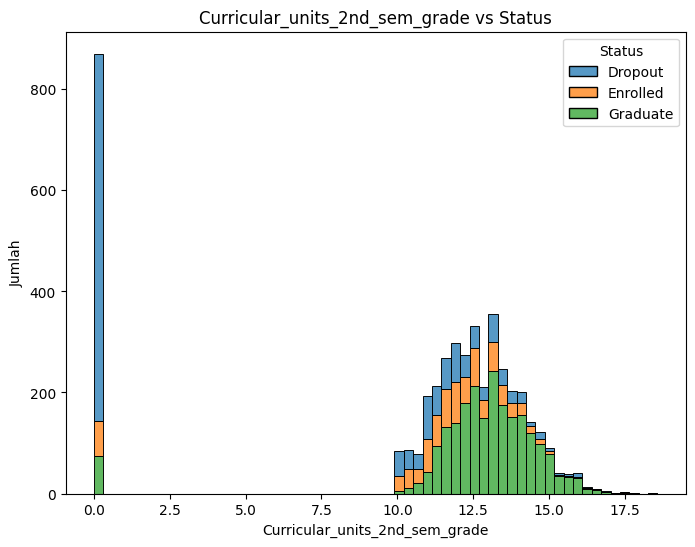

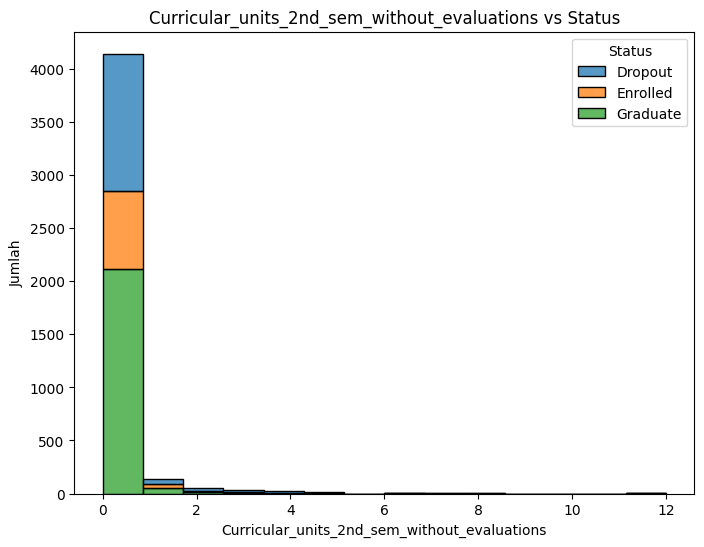

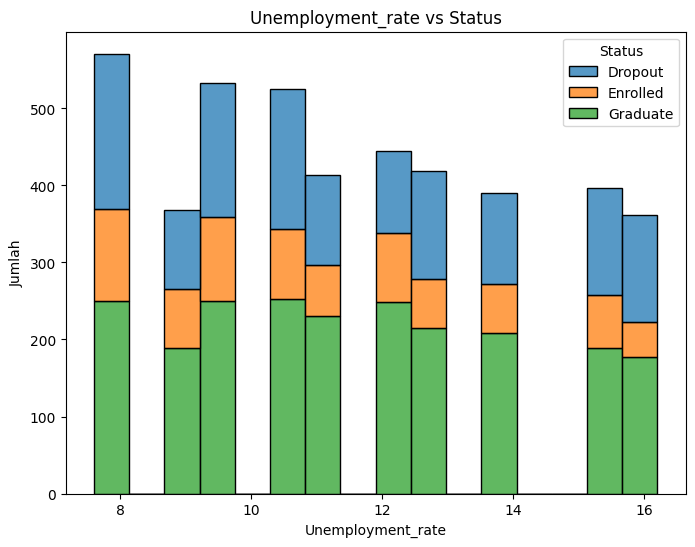

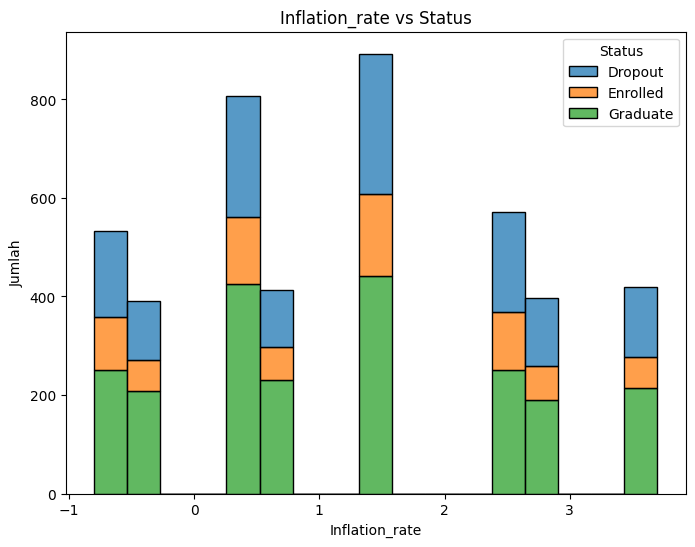

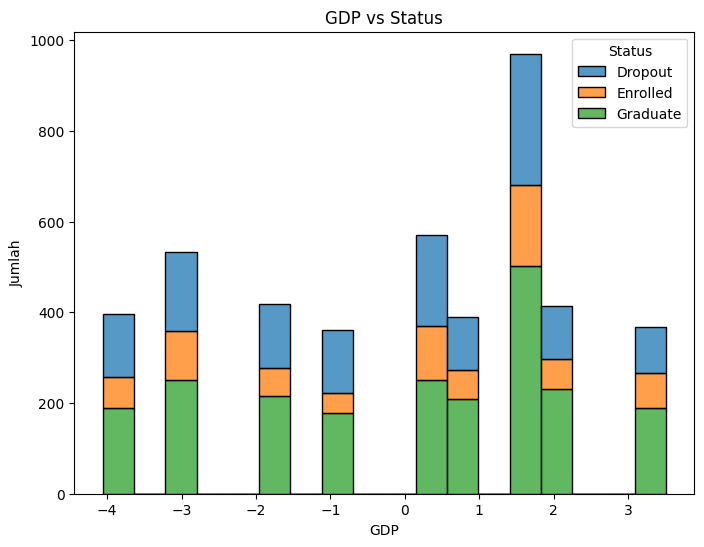

In [ ]:
# Daftar kolom numerikal
numerical_columns = df.select_dtypes(include='number').columns

# Loop untuk visualisasi Fitur vs Attrition
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, hue='Status', kde=False, multiple='stack')
    plt.title(f'{col} vs Status')
    plt.xlabel(col)
    plt.ylabel("Jumlah")
    plt.show()

In [ ]:
df_fe = df.copy()

In [ ]:
# Inisialisasi LabelEncoder
le = LabelEncoder()

# Terapkan Label Encoding ke kolom 'Status'
df_fe['Status'] = le.fit_transform(df_fe['Status'])

# Tampilkan hasil
df_fe.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [ ]:
# Tampilkan semua kolom
pd.set_option('display.max_columns', None)

# Lihat 5 baris pertama tanpa kolom terpotong
df_fe.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [ ]:
# Ambil korelasi terhadap kolom target 'Status'
correlation_with_status = df_fe.corr()['Status'].sort_values(ascending=False)

# Tampilkan korelasi hanya 1 dimensi (kolom Status)
print(correlation_with_status)

Status                                          1.000000
Curricular_units_2nd_sem_approved               0.624157
Curricular_units_2nd_sem_grade                  0.566827
Curricular_units_1st_sem_approved               0.529123
Curricular_units_1st_sem_grade                  0.485207
Tuition_fees_up_to_date                         0.409827
Scholarship_holder                              0.297595
Curricular_units_2nd_sem_enrolled               0.175847
Curricular_units_1st_sem_enrolled               0.155974
Admission_grade                                 0.120889
Displaced                                       0.113986
Previous_qualification_grade                    0.103764
Curricular_units_2nd_sem_evaluations            0.092721
Application_order                               0.089791
Daytime_evening_attendance                      0.075107
Curricular_units_2nd_sem_credited               0.054004
Curricular_units_1st_sem_credited               0.048150
Curricular_units_1st_sem_evalua

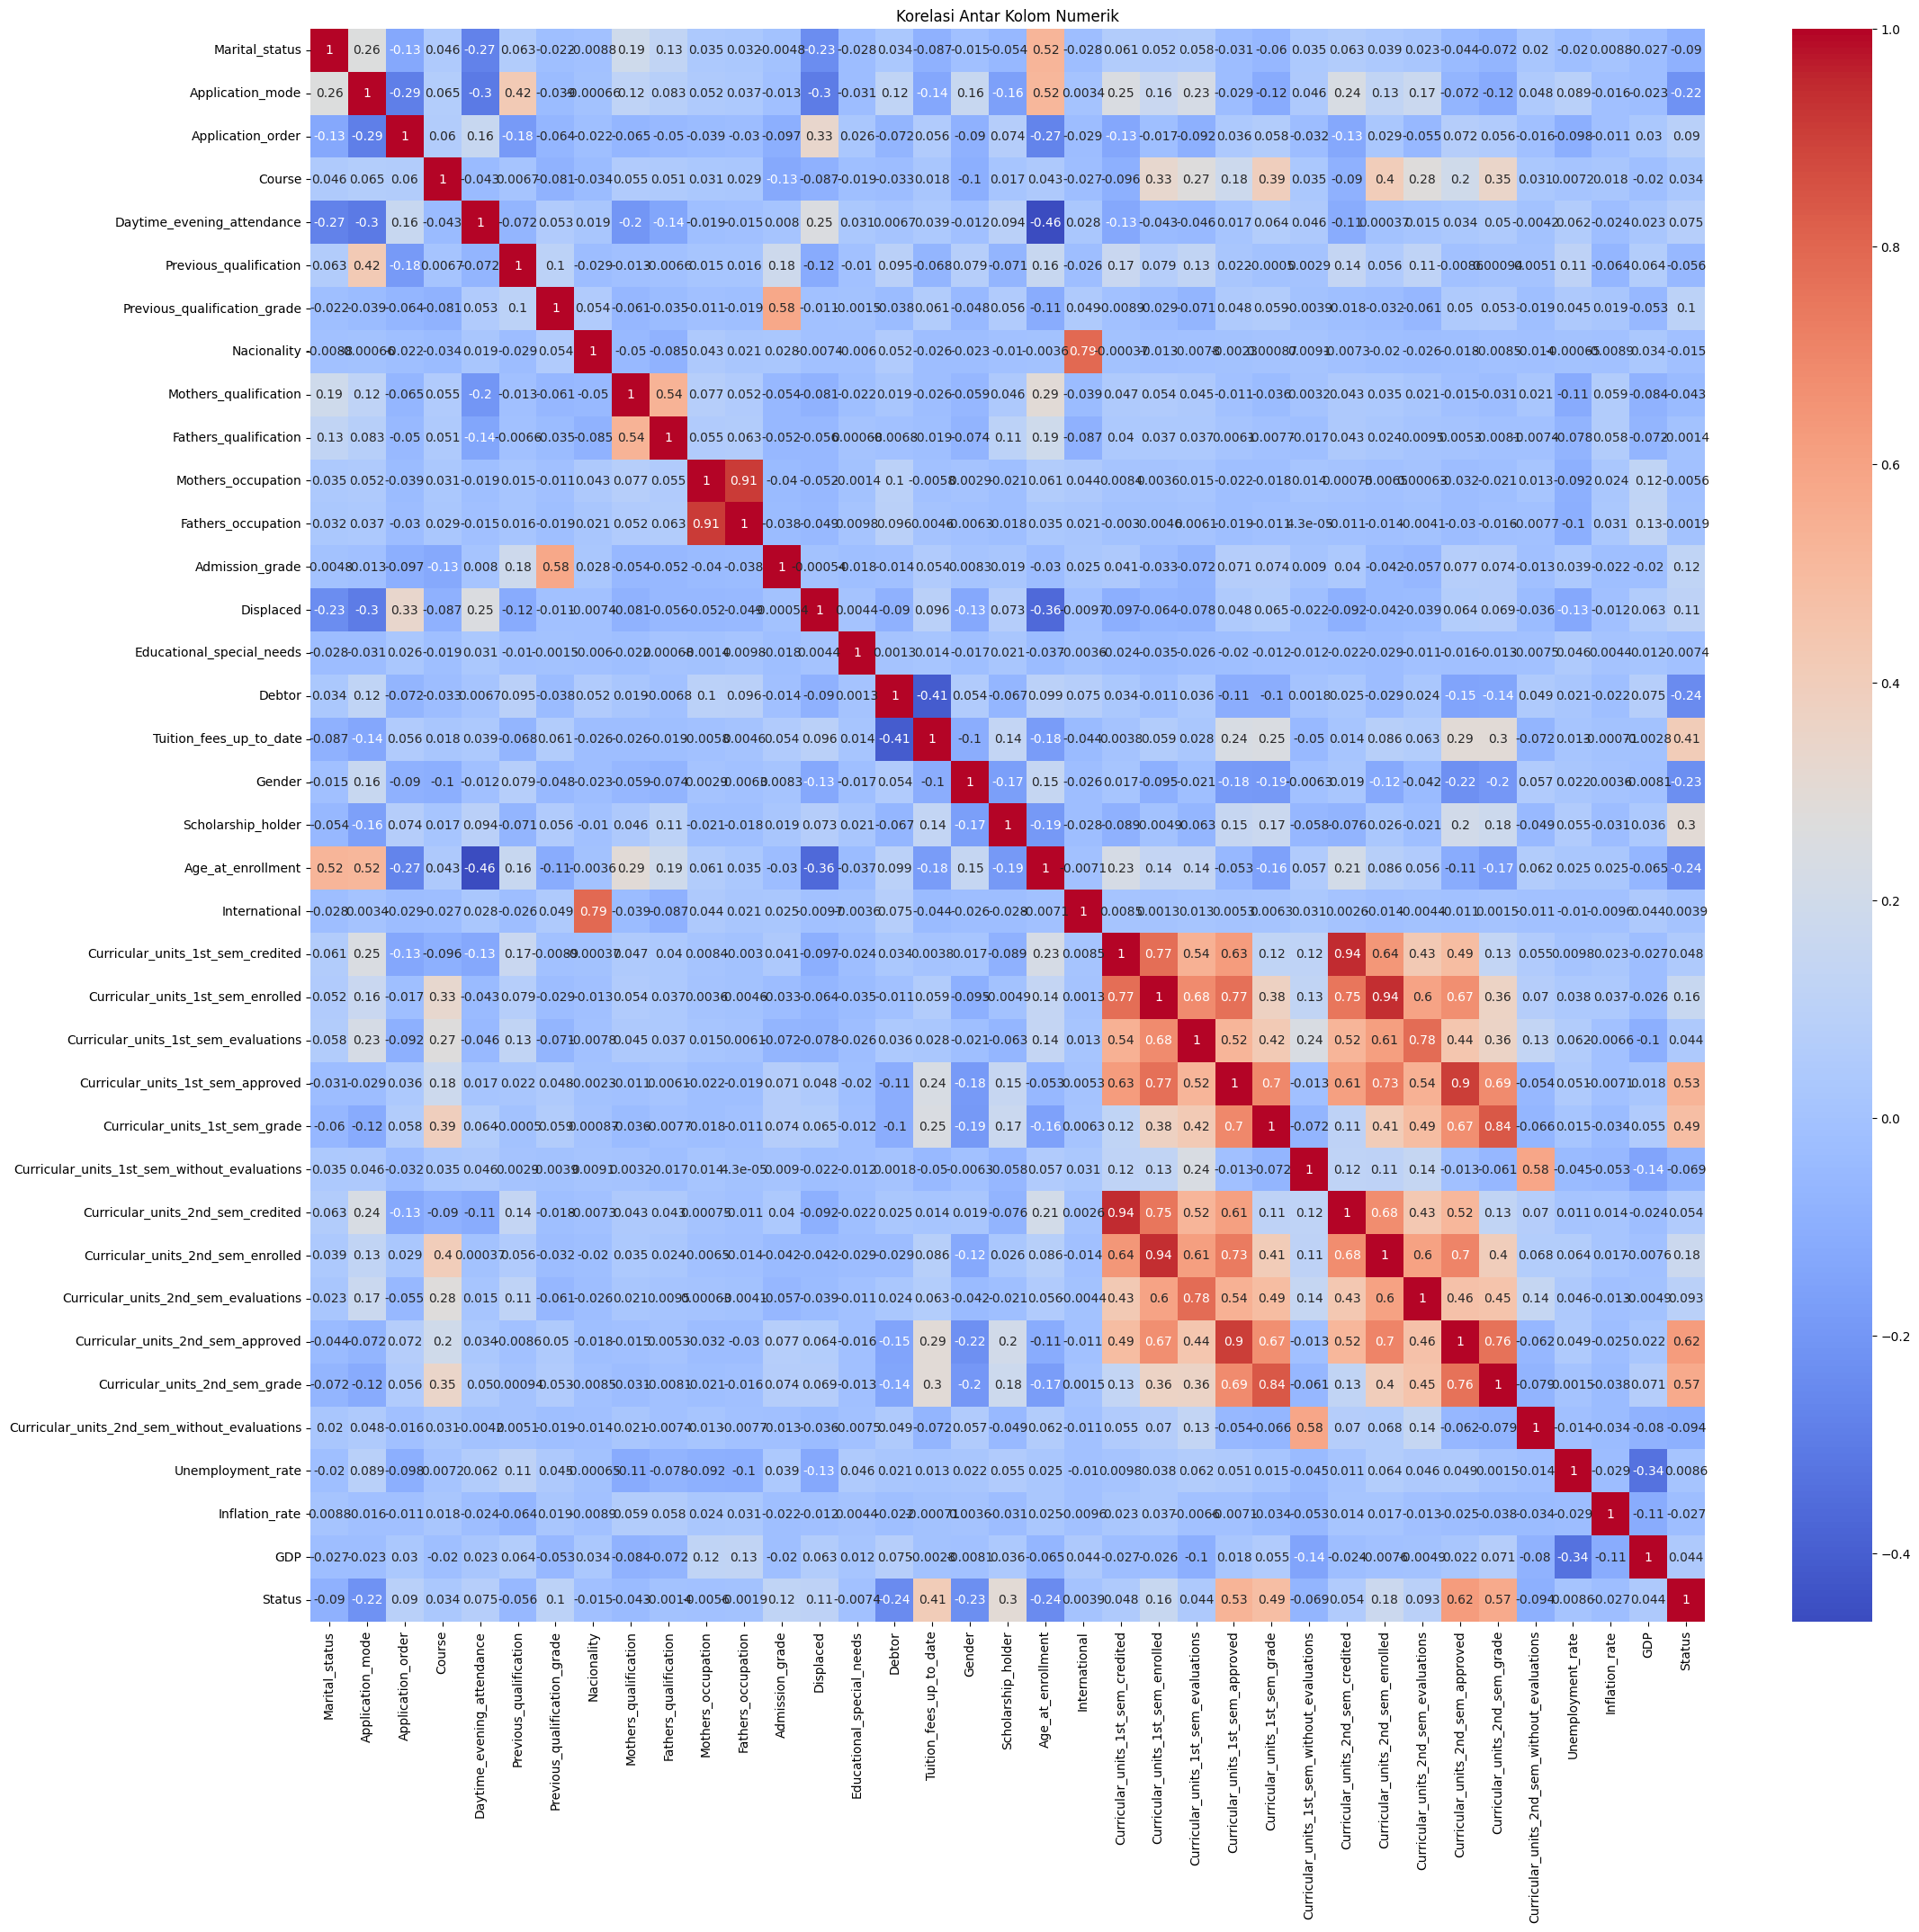

In [ ]:
# Pilih kolom numerik
numerical_columns = df_fe.select_dtypes(include='number')

# Hitung korelasi
corr_matrix = numerical_columns.corr()

# Tampilkan heatmap
plt.figure(figsize=(25, 23))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Korelasi Antar Kolom Numerik")
plt.show()

## **Modelling**

In [ ]:
# Pisahkan fitur dan target
X = df_fe.drop(columns='Status')
y = df_fe['Status']

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## **Evaluation**

In [ ]:
# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Training model
rf_model.fit(X_train, y_train)

# Prediksi data test
y_pred = rf_model.predict(X_test)


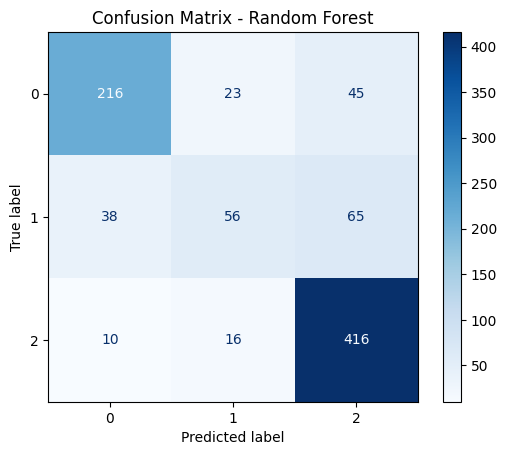

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       284
           1       0.59      0.35      0.44       159
           2       0.79      0.94      0.86       442

    accuracy                           0.78       885
   macro avg       0.73      0.68      0.70       885
weighted avg       0.76      0.78      0.76       885



In [ ]:
# Evaluasi dengan confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Metrik evaluasi
print("Classification Report:")
print(classification_report(y_test, y_pred))

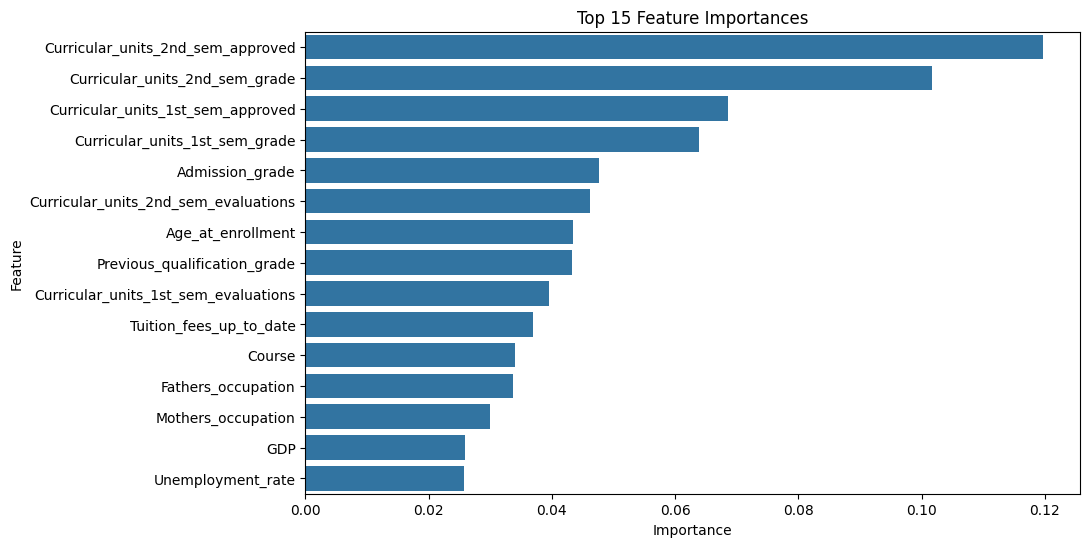

In [ ]:
# Feature Importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance.head(15), x='Importance', y='Feature')
plt.title('Top 15 Feature Importances')
plt.show()

In [ ]:
# Save model
joblib.dump(rf_model, 'students_performance_model.pkl')

['students_performance_model.pkl']

In [ ]:
!pip freeze > requirements.txt